In [1]:
import numpy as np
import pandas as pd
import os
import copy

In [2]:
ALL_MODELS = ["openai-community/gpt2", "openai-community/gpt2-medium", "openai-community/gpt2-large"] +\
    ["openai-community/gpt2-xl", "meta-llama/Llama-3.2-1B", "meta-llama/Llama-3.2-3B", "allenai/OLMo-2-0425-1B", "google/gemma-2-2b"] +\
    ["allenai/OLMo-2-1124-7B", "google/gemma-2-9b"]

SMALL_MODELS = ["openai-community/gpt2", "openai-community/gpt2-medium", "openai-community/gpt2-large"] +\
    ["openai-community/gpt2-xl", "meta-llama/Llama-3.2-1B", "allenai/OLMo-2-0425-1B",]

BIG_MODELS = ["allenai/OLMo-2-1124-7B", "google/gemma-2-9b", "meta-llama/Llama-3.2-3B", "google/gemma-2-2b"]
    #["allenai/OLMo-2-1124-7B", "google/gemma-2-9b"]


CONDITIONS = ["Linear_Representation", "Probability"]

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
to_concat = []

for model in BIG_MODELS:
    path = os.path.join("../results", model, "Correlation", "Feature_Correlations.csv")
    to_concat.append(pd.read_csv(path))

correlations = pd.concat(to_concat, axis=0)


In [6]:
correlations.head(50)

,Vector,Feature,Pearson r
0,probable_improbable,5-Gram Log-Prob,-0.350834
1,probable_improbable,GPT2-XL Log-Prob,-0.379678
2,probable_improbable,PCFG Log-Prob,-0.334694
3,probable_improbable,Arousal,-0.088526
4,probable_improbable,Conversational,-0.347304
5,probable_improbable,Sense,-0.395461
6,probable_improbable,Gram.,-0.378840
7,probable_improbable,Frequency,-0.458777
8,probable_improbable,Imageability,-0.553588
9,probable_improbable,Others Thoughts,-0.176682


In [34]:
correlations_avg = correlations.groupby(["Vector", "Feature"], as_index=False)["Pearson r"].mean()
correlations_avg["Pearson r"] = correlations_avg["Pearson r"].abs()
heatmap_data = correlations_avg.pivot(index="Vector", columns="Feature", values="Pearson r")
row_order = ["probable_improbable", "improbable_impossible", "impossible_inconceivable"]
column_order = ["Subjective Event Likelihood", "Ranked Inconceivability", "Imageability", "Physical", "Places", "Sense", "Gram.", "Arousal", "Valence", "Others Thoughts", "Conversational", "Frequency", "5-Gram Log-Prob", "PCFG Log-Prob", "GPT2-XL Log-Prob"]
heatmap_data = heatmap_data.loc[row_order, column_order]

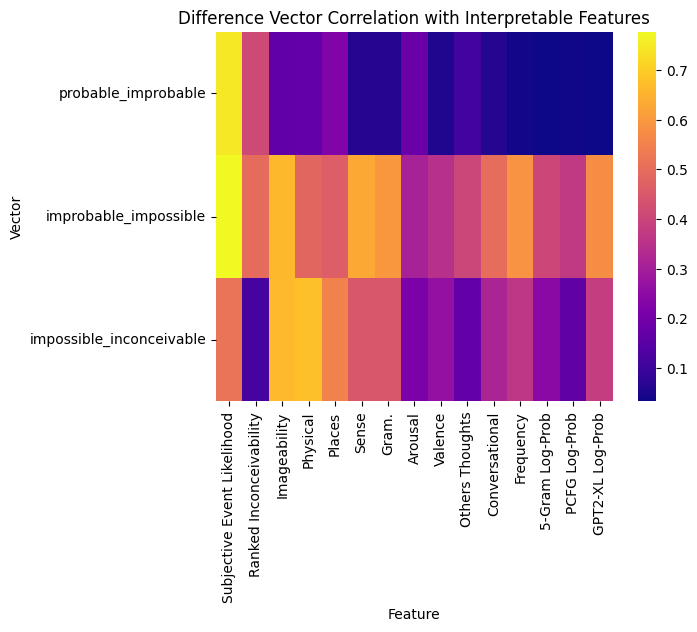

In [35]:
sns.heatmap(heatmap_data, cmap="plasma")
plt.title("Difference Vector Correlation with Interpretable Features")
plt.show()